# Your Name Here: Yuyang Zhang

# A3 LogisticRegression, Multi-layer Perceptron (MLP)

## 1. Load data and perform general EDA (3+2+1+3+6 = 15pts)

### 1.1 import libraries: numpy, matplotlib.pyplot and pandas. (1+1+1 = 3pts)

You can import other libraries below as needed in any block.

In [2]:
# TODO
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 1.2 import the data to a pandas dataframe and show the count of rows and columns (2pts)

In [3]:
# uncomment the following line if you are running this code in google colab and have uploaded the dataset to your drive
from google.colab import drive
drive.mount('/content/drive')

# TODO
file_name = '/content/drive/MyDrive/Wine_Quality_Data.csv' #you may need to change this line depending on the location of your file in Google Drive
with open(file_name, 'r') as file:
 df = pd.read_csv(file_name)
df.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(6497, 13)

### 1.3 Show if any column has null values. (1pt)

In [4]:
# TODO
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


### 1.4 We will use the 'quality' column as our target label. Print the count of each label in the dataset (in percentage). Mention which quality scores are among top 3 by their counts. (3pts)

In [6]:
# TODO
label_counts = df['quality'].value_counts()
print("Label Counts:")
print(label_counts * 100 / sum(label_counts))

top3 = label_counts[:3].index.tolist()
print("Top 3 Quality Scores:", top3)

Label Counts:
6    43.650916
5    32.907496
7    16.607665
4     3.324611
8     2.970602
3     0.461752
9     0.076959
Name: quality, dtype: float64
Top 3 Quality Scores: [6, 5, 7]


### 1.5 Observe the correlation matrix for the columns. Name the pairs of columns with highest positive and highest negative correlations. (2+4 = 6pts) 

You can import and use seaborn here to visualize correlation matrix in a heatmap.

Pairs of columns with highest positive correlation:
 fixed_acidity     fixed_acidity       1.0
volatile_acidity  volatile_acidity    1.0
dtype: float64

Pairs of columns with highest negative correlation:
 alcohol  density   -0.686745
density  alcohol   -0.686745
dtype: float64


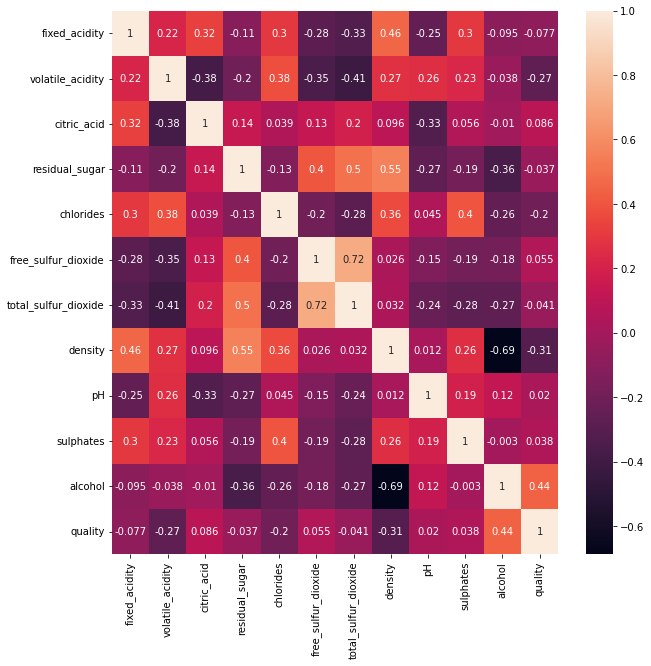

In [7]:
# TODO
import seaborn as sns
plt.figure(figsize = (10,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)

print("Pairs of columns with highest positive correlation:\n", corr_matrix.unstack().sort_values(ascending=False)[:2])
print("\nPairs of columns with highest negative correlation:\n", corr_matrix.unstack().sort_values(ascending=True)[:2])

## 2. Feature Selection and Preprocessing (2+2+3+3 = 10pts)

### 2.1 Drop the 'color' attribute from the dataframe. (2pts)

In [8]:
# TODO
df = df.drop('color', axis=1)

### 2.2 Assign the 'quality' column to target label y, and all other columns to attribute matrix X (1+1 = 2pts)

In [9]:
# TODO
y = df['quality']
X = df.drop('quality', axis=1)

### 2.3 Use scikitlearn's Standard Scaler to scale the feature matrix X. (3pts)

In [10]:
# TODO
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 2.4 Split Dataset into Training and Test set. (3 pts)
Use 80:20 split for training and test. Also use stratified sampling to ensure balanced dataset.

In [11]:
# TODO
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

## 3. Logistic Regression from scratch (10+10+10+25+20 = 75pts)


In this section, you will write a logistic regression algorithm from scratch using python and numpy. You will first write some helper functions for transforming label encoding to one-hot encoding, for measuring the cross-entropy loss and predicting labels from test data. These functions will later be used in the logistic regression training and testing.   

### 3.1 The target label in our dataset is the 'quality' column. It consists of categorical values, label-encoded with 7 values in the range [3-9]. To perform a multiclass logistic regression, you need a function that takes a label matrix and converts it to One-hot encoded labels. (10pts)

Write the function below following the docstring. 

In [13]:
def onehot(y):
    """
    Converts an array of labels to one-hot encoding.

    Parameters:
    -----------
    y : numpy.ndarray
        An array of labels. It must have a shape of (n_samples, ).

    Returns:
    --------
    numpy.ndarray
        A matrix of one-hot encoding. It has a shape of (n_samples, n_classes).
    """
    
    # TODO
    onehot_matrix = np.zeros((len(y), len(np.unique(y))))
    for i, label in enumerate(y):
      onehot_matrix[i, label - 3] = 1
    return onehot_matrix
    

### 3.2 For multi-class classification, you also need to measure cross-entropy loss. Cross-entropy loss is measured by the following formula:
$\text{Cross-Entropy Loss} = -\frac{1}{N} \sum_{i=1}^N \sum_{j=1}^n y_{ij} \log \hat{y}_{ij}$

Write a function that takes two matrices: one matrix of true labels $y_{ij}$, and one matrix of the predicted labels by your model $\hat{y}_{ij}$ (you are about to write the model function soon below), and returns the computed loss. **(10pts)**


In [14]:
def cross_entropy_loss(y_true, y_pred):
    """
    Computes the cross-entropy loss between the true labels and predicted labels.

    Parameters
    ----------
    y_true : numpy array
        Array of true labels with shape (m, n_classes).
    y_pred : numpy array
        Array of predicted labels with shape (m, n_classes).

    Returns
    -------
    float
        Cross-entropy loss between y_true and y_pred.

    Notes
    -----
    This function assumes that the labels are one-hot encoded.
    """
    
    # TODO
    m = y_true.shape[0]
    loss = -1/m * np.sum(y_true * np.log(y_pred))
    return loss

### 3.3 Write a function for softmax activation to compute probabilities from the linear score $z_i$. Softmax function uses the following formula:
$$\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{k}e^{z_j}} , \text{for } i=1,2,3,...,k $$
where $z_i$ is the linear layer score for i-th input.   

**(10pts)**

In [17]:
def softmax(scores):
    """
    Compute the softmax of the given scores.

    Parameters:
    -----------
    scores : numpy.ndarray
        A 2D numpy array of shape (m, n), where m is the number of samples and n is the number of classes.

    Returns:
    --------
    probs : numpy.ndarray
        A 2D numpy array of shape (m, n) containing the probabilities of each sample belonging to each class.
    """
       
    # TODO
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return probs

### 3.4 Model development (20+5 = 25pts)

**3.4.1** Write a function for the logistic regression algorithm. You will use the functions you have written above in this module. Recall that with gradient descent optimization, the computation loop goes as:
For each epoch:
1. Compute $scores = X_{train} W + b$ 
2. Compute probability = softmax(scores)
3. Compute Cross-entropy Loss
4. Compute gradients of the loss with respect to the weights and bias.

    Partial derivative of Loss with respect to Weight matrix:
    $$\frac{\partial L}{\partial W} = -\frac{1}{m} X^T \left(y - \hat{y}\right)$$

    Partial derivative of Loss with respect to Bias matrix:
    $$\frac{\partial L}{\partial b_j} = -\frac{1}{m} \sum_{i=1}^m \left(y_{ij} - p_{ij}\right) $$

5. Update the weights and biases
    $$ W = W - (learning\ rate * weight\ gradient)  $$
    $$ b = b - (learning\ rate * weight\ gradient)  $$

**(20pts)**

In [23]:
def logistic_regression(X_train, y_train):
    """
    Performs logistic regression using softmax activation and gradient descent optimizer to classify the input data.

    Parameters:
    -----------
    X_train : numpy.ndarray
        The input training data of shape (num_samples, num_features).
    y_train : numpy.ndarray
        The training labels of shape (num_samples,).

    Returns:
    --------
    W : numpy.ndarray
        The learned weights of shape (num_features, num_classes).
    b : numpy.ndarray
        The learned bias of shape (1, num_classes).
    loss_list : list
        The list of loss values at each epoch during training.
    """

    # get the number of samples and features from X_train (2pts)
    # TODO
    num_samples, num_features = X_train.shape

    # convert training labels to one-hot encoded labels (2pts)
    # TODO
    y_train_onehot = onehot(y_train)

    # get the number of target classes from y_train (2pts)
    # TODO
    num_classes = y_train_onehot.shape[1]

    # initialize the weights and bias with numpy arrays of zeros (1+1 = 2pts)
    # TODO
    W = np.zeros((num_features, num_classes))
    b = np.zeros((1, num_classes))

    # set hyperparameters (1+1 = 2pts)
    ## set a learning rate
    # TODO
    lr = 0.01
    ## set the max number of epochs you want to train for
    # TODO
    max_epochs = 1000
    ## initialize a list to store the loss values (1pt)
    # TODO
    loss_list = []
    
    '''
    Write a for loop over epochs.
    In each epoch:
        compute the score for each class, 
        compute the softmax probabilities, 
        compute the cross-entropy loss, 
        compute the gradients of the loss with respect to the weights and bias, 
        update the weights and bias using the gradients and the learning rate.
    '''
    # (9pts)
    # TODO
    for e in range(max_epochs):
        # compute the score (Z) for each class. 
        # TODO
        Z = np.dot(X_train, W) + b

        # calculate the softmax probabilities
        # TODO
        probs = softmax(Z)

        # compute the cross-entropy loss
        # TODO
        loss = cross_entropy_loss(y_train_onehot, probs)

        # compute the gradients of the loss with respect to the weights and bias
        # TODO
        dW = -1 / num_samples * np.dot(X_train.T, (y_train_onehot - probs))
        db = -1 / num_samples * np.sum(y_train_onehot - probs, axis=0, keepdims=True)

        # update the weights and bias using the gradients and the learning rate
        # TODO
        W -= lr * dW
        b -= lr * db

        # For tracking progress, print the loss every 100 epochs
        # TODO
        if e % 100 == 0:
          print(f"Loss at epoch {e}: {loss}")
        loss_list.append(loss)
    return W, b, loss_list

**3.4.2** Now that you have the model and the helper function, train the model with your prepared training dataset. Then plot the training loss curve. **(5pts)**

Loss at epoch 0: 1.9459101490553132
Loss at epoch 100: 1.7026863237094045
Loss at epoch 200: 1.5443444179679695
Loss at epoch 300: 1.4395104149392772
Loss at epoch 400: 1.3674225821383603
Loss at epoch 500: 1.3160019260141653
Loss at epoch 600: 1.278154082587394
Loss at epoch 700: 1.2495271762885807
Loss at epoch 800: 1.2273427665579695
Loss at epoch 900: 1.2097714482568198


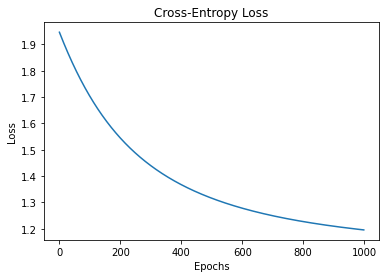

In [24]:
# train the model
# TODO
W, b, loss_list = logistic_regression(X_train, y_train)

# plot the loss curve
# TODO
plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Cross-Entropy Loss')
plt.show()

### 3.5 Evaluation (10+1+4+3+2 = 20pts)

Write a function to predict the labels of X_test using the model trained above and return the predicted labels as categorical values similar to train labels. **(10pts)**

Note: By default, the predicted labels may return values within [0-6] instead of the original labels [3-9]. This can happen due to using argmax() to get label encoding from one-hot encoding when predicting test labels. You can add a simple offset to the argmax outputs of predicted labels to shift them to the range of [3-9]. This is important to note as you may see a very low accuracy even with a good model if true labels and predicted labels are not associated with the same categorical scale. 

In [25]:
def predict(X_test, W, b):
    '''
    X_test: a numpy array of testing features
    W: a numpy array of weights
    b: a numpy array of bias
    return: a numpy array of one-hot encoded labels
    '''
    # compute the scores
    # TODO
    scores = np.dot(X_test, W) + b
    
    # compute the probabilities
    # TODO
    probs = softmax(scores)
    
    # get the predicted labels
    # TODO
    pred_labels = np.argmax(probs, axis=1)
    
    # add an offset of 3 to shift the predicted labels from [0-6] to [3-9]
    pred_labels += 3
    
    # return the predicted labels as categorical values
    return pred_labels

**3.5.1** import accuracy_score, confusion_matrix, precision_score, recall_score and f1_score from scikitlearn **(1pts)**

In [26]:
# TODO
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

**3.5.2** Print the prediction scores on test data in terms of accuracy, precision and recall score. **(4pts)**

In [27]:
# TODO
y_pred = predict(X_test, W, b)

# calculate the accuracy score
acc = accuracy_score(y_test, y_pred)

# calculate the precision score
prec = precision_score(y_test, y_pred, average='macro')

# calculate the recall score
rec = recall_score(y_test, y_pred, average='macro')

# print the accuracy, precision, and recall scores
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")

Accuracy: 0.53
Precision: 0.23
Recall: 0.21


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**3.5.3** Generate and visualize the confusion matrix. You can use seaborn heatmap to visualize a heatmap of the confusion matrix. **(3pts)**

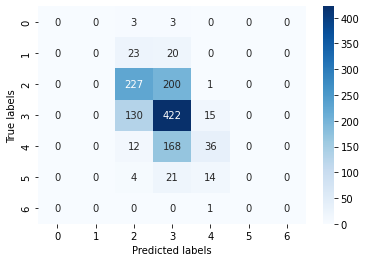

In [33]:
# TODO
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**3.5.4** Which labels seem to be harder to classify for this model? **(2pts)**

/ # TODO

Labels 0, 1, 5 (corresponding to 3, 4, 8) are hard to classify in this model. Because the predict labels only classify the labels 2, 3, 4, but there are some labels should be in labels 0, 1, 5 due to the true labels. 

## 4. Using Scikitlearn Logistic Regression (4+2+7+2 = 15pts)

### 4.1 Import LogisticRegressionCV module and create an instance of it. (4pts)
Use the following parameters:
1. 5-fold crossvalidation, 
2. lbfgs solver, 
3. run for 1000 iterations 
4. use 'multinomial' for choosing softmax classifier  

In [35]:
# TODO
from sklearn.linear_model import LogisticRegressionCV
lrcv = LogisticRegressionCV(cv=5, solver='lbfgs', max_iter=1000, multi_class='multinomial')

### 4.2 Train the model and predict the labels for test set. (2pts) 

In [36]:
# TODO
lrcv.fit(X_train, y_train)
y_pred_lrcv = lrcv.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


### 4.3 Compute the accuracy, precision, recall and F1 scores. Also visualize the confusion matrix. (1+1+1+1+3 =7pts) 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5346
Precision: 0.5351
Recall: 0.5346
F1 Score: 0.5064


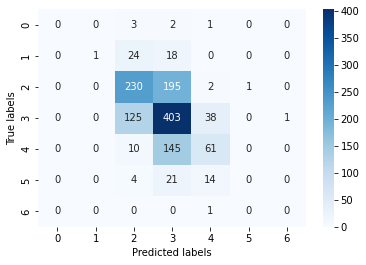

In [37]:
# TODO
acc = accuracy_score(y_test, y_pred_lrcv)
prec = precision_score(y_test, y_pred_lrcv, average='weighted')
rec = recall_score(y_test, y_pred_lrcv, average='weighted')
f1 = f1_score(y_test, y_pred_lrcv, average='weighted')

print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1 Score: {f1:.4f}")

# Compute confusion matrix
cm_lrcv = confusion_matrix(y_test, y_pred_lrcv)

# Plot confusion matrix
cm_lrcv = confusion_matrix(y_test, y_pred_lrcv)
sns.heatmap(cm_lrcv, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

### 4.4 Did your previous model (built from scratch) and the model from scikitlearn library produced similar evaluation scores? (2pts)

Explain (in <100 words) the similarity and dissimilarity in score. What changed, what didn't, and why?

/ # TODO

The accuracy obtained from my logistic regression model and the scikit-learn model are similar, which means both models have a same overall correctness. However, the scikit-learn model has higher precision and recall than my model.This is because the scikit-learn model uses optimization algorithms, regularization parameters, or additive tuning of hyperparameters to improve the model's ability to correctly identify positive samples, while maintaining similar overall performance.

## 5. Using Scikitlearn Multi-layer Perceptron (16+19 = 35pts)

### 5.1 MLP with one hidden layer and stochastic gradient descent optimizer (4+2+1+7+2 = 16pts)

**5.1.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. One hidden layer with 100 neurons, 
2. ReLu activation, 
3. Stochastic Gradient Descent solver
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

In [38]:
# TODO
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='sgd', learning_rate_init=0.01, max_iter=1000, random_state=42)

**5.1.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [39]:
# TODO
# Train the model
mlp.fit(X_train, y_train)

# Predict the labels for test set
y_pred_mlp = mlp.predict(X_test)

**5.1.3** Plot the loss curve **(1pt)**

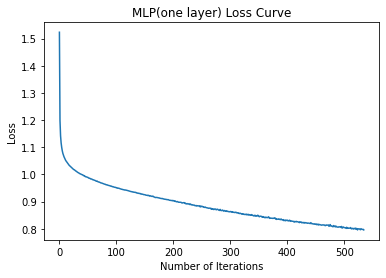

In [47]:
# TODO
plt.plot(mlp.loss_curve_)
plt.title('MLP(one layer) Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

**5.1.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.5615384615384615
Precision: 0.5503561827047087
Recall: 0.5615384615384615
F1 Score: 0.5441699202514731


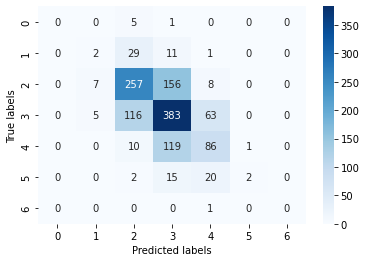

In [41]:
# TODO
acc = accuracy_score(y_test, y_pred_mlp)
prec = precision_score(y_test, y_pred_mlp, average='weighted')
rec = recall_score(y_test, y_pred_mlp, average='weighted')
f1 = f1_score(y_test, y_pred_mlp, average='weighted')

# Print accuracy, precision, recall and f1 scores
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Print confusion matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**5.1.5** Did you see any change in scores after using the MLP classifier?

In <100 words, describe your observation. **(2pts)**

Compared with Logistic Regression, the Accuracy, Precision, and Recall obtained by using the MLP (1 hidden layer) Classifier model are slightly higher. This is because an MLP classifier is a neural network-based model that better captures non-linear relationships in the data than logistic regression, which is a linear model.

/ # TODO

### 5.2 MLP with two hidden layer and adam optimizer (4+2+1+7+2+3 = 19pts)

**5.2.1** Import MLPClassifier from scikitlearn's neural_network library. Then create a model instance of this classifier.

Use the following parameters: 
1. **Two** hidden layers with 100 neurons, 
2. ReLu activation, 
3. Adam solver (this is an advanced optimizer which we did not cover in class. However the usage is quite straightforward)
4. Learning rate = 0.01 (or you can continue to use your previous learning rate)
5. No of epoch = 1000

Also, set random_state to a fixed value so that your result is reproducible. **(4pts)** 

(Refer to the scikitlearn documentation for clarification on the parameters)

In [42]:
# TODO
from sklearn.neural_network import MLPClassifier
mlp_thl = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', learning_rate_init=0.01, max_iter=1000, random_state=42)

**5.2.2** Train the model with training set.
Then predict the labels for test set. **(2pts)**

In [43]:
# TODO
mlp_thl.fit(X_train, y_train)
y_pred_thl = mlp_thl.predict(X_test)

**5.2.3** Plot the loss curve **(1pt)**

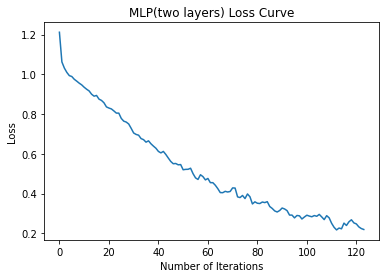

In [46]:
# TODO
plt.plot(mlp_thl.loss_curve_)
plt.title('MLP(two layers) Loss Curve')
plt.xlabel('Number of Iterations')
plt.ylabel('Loss')
plt.show()

**5.2.4** Print the accuracy, precision, recall and F1 scores. Also show the confusion matrix. **(1+1+1+1+3 = 7pts)**

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.6007692307692307
Precision: 0.6049328568331065
Recall: 0.6007692307692307
F1 Score: 0.6014343131738111


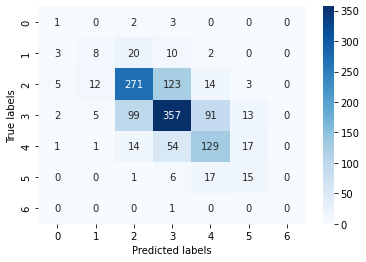

In [45]:
# TODO
acc = accuracy_score(y_test, y_pred_thl)
prec = precision_score(y_test, y_pred_thl, average='weighted')
rec = recall_score(y_test, y_pred_thl, average='weighted')
f1 = f1_score(y_test, y_pred_thl, average='weighted')

# Print accuracy, precision, recall and f1 scores
print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# Print confusion matrix
cm_thl = confusion_matrix(y_test, y_pred_thl)
sns.heatmap(cm_thl, annot=True, cmap="Blues", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

**5.2.5** Describe any difference in the loss curve from MLP with one hidden layer and MLP with two hidden layer. **(2pts)**



/ # TODO

The MLP with two hidden layers shows more fluctuations compared to the MLP with one hidden layer. This is because MLP with 2 layers has higher complexity and convergence, this cause it performs a steeper loss descent over time and reach lower minimum loss value.

**5.2.6** Did you see any change in scores between the two MLP models?

In <100 words, describe your observation. **(3pts)**

MLP with two hidden layers performs higher Accuracy, Precision, Recall compared to MLP with one hidden layer. This is because an MLP with two hidden layers has a more complex architecture than an MLP with one hidden layer, which enables it to learn more complex and non-linear relationships in the dataset.

/ # TODO